# Normality Check

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.



## Load Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)
random_state = 42

## Check for normality of test/target variable

In statistics, __normality__ tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

__Skewness__ is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Skewness in a data series may sometimes be observed not only graphically but by simple inspection of the values. For instance, consider the numeric sequence (49, 50, 51), whose values are evenly distributed around a central value of 50. We can transform this sequence into a negatively skewed distribution by adding a value far below the mean, e.g. (40, 49, 50, 51). Similarly, we can make the sequence positively skewed by adding a value far above the mean, e.g. (49, 50, 51, 60). __Lesser the skewness, more normally distributed the dataset is.__

__Kurtosis__ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


 mu = 180921.20 and sigma = 79415.29



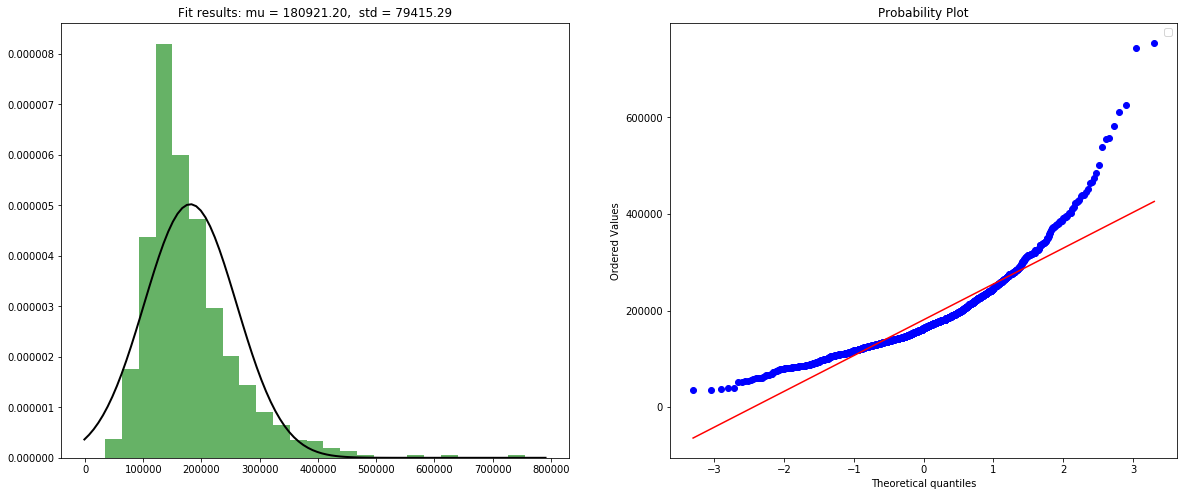

Skewness: 1.882876
Kurtosis: 6.536282


In [4]:
data = train['SalePrice']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train['SalePrice'], plot=ax2)

plt.show()


print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

__Observations :__
-  Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.
-  Both the value of Skewness & Kurtosis are high, it doesn't represent a normal distribution. For normal distribution, the Skewness is below 1 & Kurtosis below 3.

__The above test are visual test for normality, Below are few more test that can be done to test for normal distribution:- __

1. D'Agostino's K-squared test,
2. Jarque–Bera test,
3. Anderson–Darling test,
4. Cramér–von Mises criterion,
5. Lilliefors test,
6. Kolmogorov–Smirnov test,
7. __Shapiro–Wilk test :__  The Shapiro-Wilk test, proposed in 1965, calculates a W statistic that tests whether a random sample, x1,x2,…,xn comes from (specifically) a normal distribution . Small values of W are evidence of departure from normality

8. Pearson's chi-squared test
9. __Anderson–Darling__ : The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. _If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references._

In [5]:
#Shapiro–Wilk test
stats.shapiro(train['SalePrice'])

(0.869671642780304, 3.206247534576162e-33)

In [6]:
#Anderson–Darling test
stats.anderson(train['SalePrice'], dist='norm')

AndersonResult(statistic=41.69199630641583, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

__Observation :__

-  When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis. The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue.
    -  A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    -  A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
-  Based on the p value from Shapiro–Wilk test (3.206247534576162e-33), the null hypothesis is rejected as 3.206247534576162e-33 not greater than 0.5. This data doesn't belong from a normal distribution.
-  Based on the test statistics of Anderson–Darling test, we can see that the statistic is way more than the critical_values for any significance_level, so the hypotheis is rejected. The data set is not from normal distribution.

__The data is not derived from a normal distribution based on the target variable, we will check if the error follows a normal distribution or not ?__

## Validate if the Error follows a normal distribution

## Next step after finding normality of data?

# Reference

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/